# CHALLENGE STATEMENT


# PART 1: Prepare Data

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

%matplotlib inline
import matplotlib.pyplot as plt

# hola

In [ ]:
data=pd.read_csv('BikeSharing_Bluebikes2022.csv')
data.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
starttime,,,,,,,,,,,,,,
2022-01-01 00:00:25.1660,0,597,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
2022-01-01 00:00:40.4300,1,411,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2022-01-01 00:00:54.8180,2,476,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
2022-01-01 00:01:01.6080,3,466,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
2022-01-01 00:01:06.0520,4,752,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.9190,487196,591,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139
2022-08-31 23:59:45.7290,487197,631,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN
2022-08-31 23:59:48.6080,487198,521,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118


In [ ]:
data.describe()

,Unnamed: 0,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid
count,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06
mean,1.786946e+05,1.677280e+03,1.969274e+02,4.235836e+01,-7.108997e+01,1.943029e+02,4.235826e+01,-7.108976e+01,5.160746e+03
std,1.231806e+05,2.396786e+04,1.665054e+02,1.874017e-02,2.841243e-02,1.659709e+02,1.882696e-02,2.848096e-02,1.752306e+03
min,0.000000e+00,6.100000e+01,1.000000e+00,4.216723e+01,-7.124776e+01,1.000000e+00,4.216723e+01,-7.124776e+01,2.180000e+02
25%,7.205400e+04,4.440000e+02,6.100000e+01,4.234836e+01,-7.110734e+01,6.000000e+01,4.234828e+01,-7.110729e+01,3.641000e+03
50%,1.601320e+05,7.520000e+02,1.250000e+02,4.235848e+01,-7.109051e+01,1.200000e+02,4.235810e+01,-7.109039e+01,5.254000e+03
75%,2.709610e+05,1.287000e+03,3.590000e+02,4.236707e+01,-7.107060e+01,3.570000e+02,4.236662e+01,-7.107060e+01,6.643000e+03
max,4.872000e+05,3.401096e+06,5.720000e+02,4.253467e+01,-7.087021e+01,5.720000e+02,4.253467e+01,-7.087021e+01,8.129000e+03


In [ ]:
#STEP 1: Convert the columns 'starttime' and 'stoptime' in a datetime value
from datetime import datetime as dt

data['starttime'] = pd.to_datetime(data['starttime'], format='%Y-%m-%d %H:%M:%S')
data['stoptime'] = pd.to_datetime(data['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
from datetime import datetime as dt

data['starttime2']=pd.Series(data['starttime']).dt.floor("H")
# data.assign(Date = lambda x: pd.to_datetime(data['starttime'], format='%Y-%m-%d %H'))
# data['stoptime2'] = data.assign(Date = lambda x: pd.to_datetime(data['stoptime'], format='%Y-%m-%d %H')

In [ ]:
data

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,starttime2,stoptime2
0,0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:10:22.192
1,1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:07:32.198
2,2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:51.668
3,3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:48.235
4,4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,2022-01-01 00:00:00,2022-01-01 00:13:38.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,487196,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.049,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139,2022-08-31 23:00:00,2022-09-01 00:09:36.049
2305731,487197,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.207,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN,2022-08-31 23:00:00,2022-09-01 00:10:17.207
2305732,487198,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.325,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118,2022-08-31 23:00:00,2022-09-01 00:08:30.325
2305733,487199,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.493,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7690,Subscriber,NaN,2022-08-31 23:00:00,2022-09-01 01:38:27.493


In [ ]:
#STEP 2: Split the data

split=int(len(data)*0.7)
x_train = data[data['starttime']<='2022-07-01']
x_test = data[data['starttime']>='2022-07-01']
# y_train = data[:split]
# y_test = data[split:]

In [ ]:
x_train.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,starttime2,stoptime2
starttime,,,,,,,,,,,,,,,,
2022-01-01 00:00:25.166,0,597,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:10:22.192
2022-01-01 00:00:40.430,1,411,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:07:32.198
2022-01-01 00:00:54.818,2,476,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:51.668
2022-01-01 00:01:01.608,3,466,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,2022-01-01 00:01:00,2022-01-01 00:08:48.235
2022-01-01 00:01:06.052,4,752,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,2022-01-01 00:01:00,2022-01-01 00:13:38.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 23:59:34.689,388526,994,2022-07-01 00:16:09.418,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,2590,Subscriber,02139,2022-06-30 23:59:00,2022-07-01 00:16:09.418
2022-06-30 23:59:35.002,388527,795,2022-07-01 00:12:50.376,441,Sullivan Square,42.384452,-71.075149,397,Broadway at Beacham St,42.398361,-71.063738,4679,Subscriber,02143,2022-06-30 23:59:00,2022-07-01 00:12:50.376
2022-06-30 23:59:37.082,388528,1466,2022-07-01 00:24:03.656,374,Tremont St at Hamilton Pl,42.356683,-71.061666,296,Farragut Rd at E. 6th St,42.333400,-71.024950,5765,Subscriber,02127,2022-06-30 23:59:00,2022-07-01 00:24:03.656


In [ ]:
y=pd.DataFrame(data.groupby([data['starttime'].dt.month,data['starttime'].dt.day,data['starttime'].dt.hour]).starttime.count())

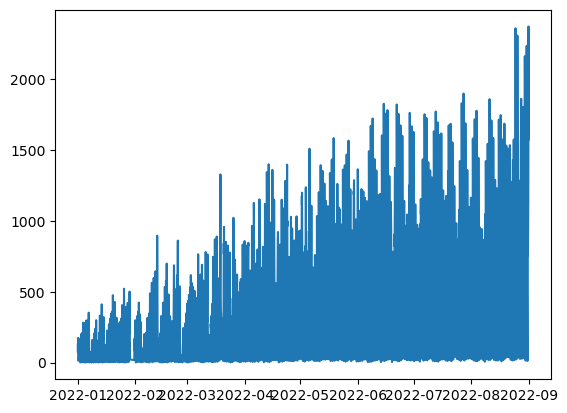

In [ ]:
hours_starttime=data["starttime2"].unique()

In [ ]:
y['Date']=hours_starttime

In [ ]:
plt.plot(y['Date'],y['starttime'])

In [ ]:
y

starttime                Date
starttime starttime starttime                               
1         1         0                125 2022-01-01 00:00:00
                    1                 92 2022-01-01 01:00:00
                    2                 73 2022-01-01 02:00:00
                    3                 95 2022-01-01 03:00:00
                    4                 91 2022-01-01 04:00:00
...                                  ...                 ...
8         31        19              1403 2022-08-31 19:00:00
                    20              1661 2022-08-31 20:00:00
                    21              2370 2022-08-31 21:00:00
                    22              2106 2022-08-31 22:00:00
                    23              1575 2022-08-31 23:00:00

[5773 rows x 2 columns]

In [ ]:
dic = {}
for i in range len(y):
    

starttime  starttime
1          0            125
           1             92
           2             73
           3             95
           4             91
                       ... 
31         19           155
           20           168
           21           227
           22           298
           23           232
Name: starttime, Length: 689, dtype: int64

In [ ]:
df_pickups = pd.DataFrame(y, columns=[hours_starttime'])

In [ ]:
df_pickups

,hours_starttime


# PART 2: Prediction Challenge

# PART 3: Exploratory component

In [3]:
data_exp=pd.read_csv('BikeSharing_Bluebikes2022.csv')
data_exp.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
starttime,,,,,,,,,,,,,,
2022-01-01 00:00:25.1660,0,597,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
2022-01-01 00:00:40.4300,1,411,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2022-01-01 00:00:54.8180,2,476,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
2022-01-01 00:01:01.6080,3,466,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
2022-01-01 00:01:06.0520,4,752,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.9190,487196,591,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139
2022-08-31 23:59:45.7290,487197,631,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN
2022-08-31 23:59:48.6080,487198,521,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118


In [4]:
nat_hol = ['2022-01-01','2022-01-17','2022-02-21','2022-04-17','2022-04-18','2022-05-08','2022-05-30','2022-06-19','2022-06-20','2022-07-04']

data_exp['is_Holiday'] = [ 1 if data_exp.iloc[i]['starttime'][0:10] in nat_hol else 0 for i in range(len(data_exp))]


In [5]:
data_w = pd.read_csv("Boston 2022-01-01 to 2022-08-31.csv")
drop = ['dew', 'sunrise','sunset','moonphase','conditions', 'description','stations','sealevelpressure',
'windgust','severerisk', 'uvindex', 'solarenergy', 'solarradiation','preciptype','winddir','name']
data_w = data_w.drop(columns = drop)
data_w['datetime'] = pd.to_datetime(data_w['datetime'])

In [6]:
# for column in data_w.columns:
#     data_exp[column] = [data_w[column] if data_exp.iloc[i]['starttime'][0:10] == data_w['datetime'] else 0 for i in range(len(data_exp))]
from datetime import datetime as dt

data_exp['starttime'] = pd.to_datetime(data_exp['starttime'], format='%Y-%m-%d %H:%M:%S')
data_exp['datetime'] = pd.to_datetime(data_exp['starttime']).dt.date
data_exp['datetime'] = pd.to_datetime(data_exp['datetime'])

data_merge = data_exp.merge(data_w, how='left', on='datetime')

In [7]:
data_merge.columns
data_merge = data_merge.drop(columns=(['Unnamed: 0']))
# data_merge = data_merge.set_index('datetime')


In [8]:
data_merge


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon
0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305731,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305732,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain
2305733,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.4930,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,...,63.1,8.351,100,16.67,0.0,0.0,31.6,49.3,16.0,rain


## VISUALIZATIONS

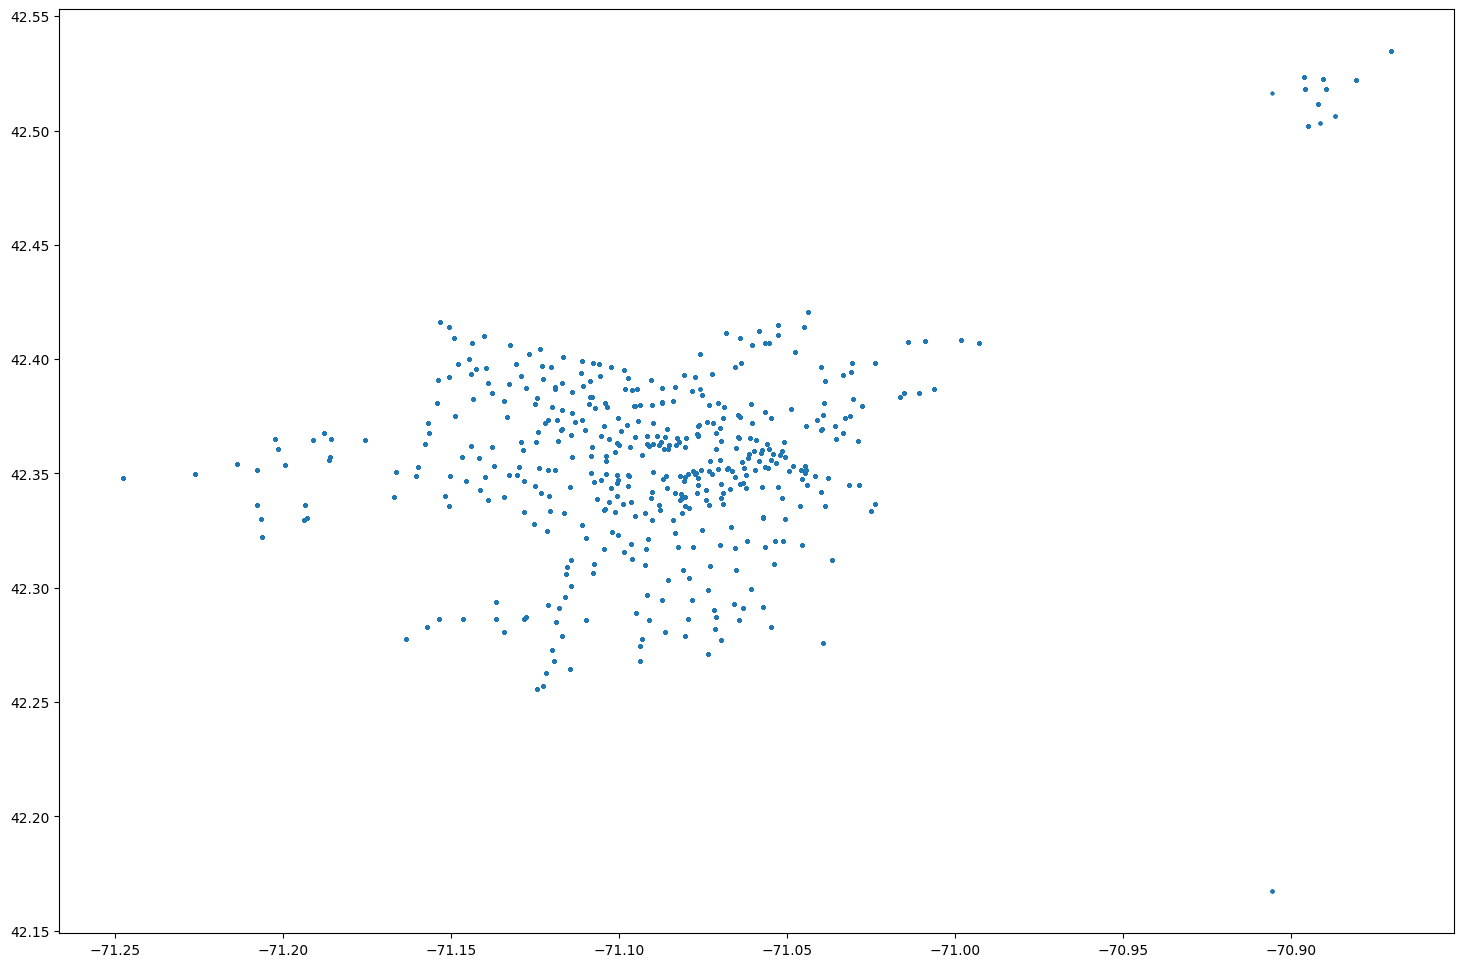

In [9]:
plt.figure(figsize=(18, 12))
plt.scatter(data_merge['start station longitude'], data_merge['start station latitude'],s=3)

#Mismas estaciones, por eso no se ven todas las calles
# IDEA: Ver trayectos empezando siempre desde una misma estacion con lineas

# plt.xlim((min(data_merge['start station longitude']), max(data_merge['start station latitude'])))
# plt.ylim((min(data_merge['start station longitude']), max(data_merge['start station latitude'])))

In [113]:
data_merge

442

In [60]:
data_w['datetime']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
238   2022-08-27
239   2022-08-28
240   2022-08-29
241   2022-08-30
242   2022-08-31
Name: datetime, Length: 243, dtype: datetime64[ns]

In [62]:
from datetime import date
group=pd.DataFrame(data_merge.groupby([data_merge['datetime'].dt.year,data_merge['datetime'].dt.month,data_merge['datetime'].dt.day]).datetime.count())
group
# data_merge['datetime'].unique()
group.index[1]
dic = {}
for i in range(len(group)):
    dic[date(*group.index[i])] = group.values[i][0]


df = pd.DataFrame(dic, index=[0])
df = df.T
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])


In [82]:
merge = data_w.merge(df, on='datetime', how='inner')
merge = merge.rename(columns = {0 : 'pickups'})
merge['is_Holiday'] = [ 1 if str(merge.iloc[i]['datetime'])[0:10] in nat_hol else 0 for i in range(len(merge))]
merge

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0


C:\Users\mirun\AppData\Local\Temp\ipykernel_14404\2929491100.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge.corr()


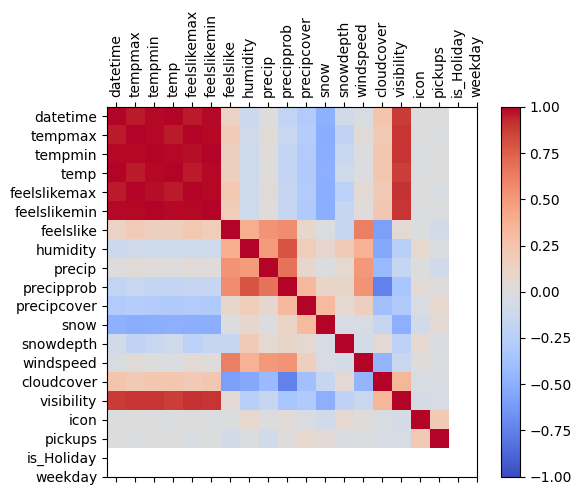

## Day of the week

In [86]:
count = 6
for i in range(len(merge)):
    merge['weekday'][i] = count
    count +=1
    if count > 7:
        count = 1

merge

C:\Users\mirun\AppData\Local\Temp\ipykernel_14404\1512682917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['weekday'][i] = count


,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,humidity,precip,precipprob,precipcover,snow,snowdepth,windspeed,cloudcover,visibility,icon,pickups,is_Holiday,weekday
0,2022-01-01,10.7,6.8,8.3,10.7,5.0,7.6,98.2,1.225,100,29.17,0.0,0.0,11.0,100.0,3.0,rain,2123,1,6
1,2022-01-02,7.9,1.1,6.1,7.3,-3.5,3.6,90.0,5.814,100,50.00,0.0,0.0,27.5,95.1,7.3,rain,1940,0,7
2,2022-01-03,0.6,-5.0,-2.8,-4.7,-12.4,-9.2,52.0,0.000,0,0.00,0.0,0.0,28.9,94.9,16.0,cloudy,2624,0,1
3,2022-01-04,-0.6,-8.3,-4.5,-3.9,-16.3,-10.0,43.2,0.000,0,0.00,0.0,0.0,23.8,26.8,16.0,partly-cloudy-day,2686,0,2
4,2022-01-05,10.6,-3.1,5.0,10.6,-8.3,1.9,84.1,3.209,100,29.17,0.0,0.0,31.0,85.9,15.3,rain,2617,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2022-08-27,25.0,20.6,21.9,25.0,20.6,21.9,82.6,0.000,0,0.00,0.0,0.0,27.4,76.0,15.9,partly-cloudy-day,21555,0,5
238,2022-08-28,24.0,18.8,21.6,24.0,18.8,21.6,75.3,0.000,0,0.00,0.0,0.0,29.0,52.5,16.0,partly-cloudy-day,21985,0,6
239,2022-08-29,31.2,18.8,24.3,32.6,18.8,24.9,70.6,0.000,0,0.00,0.0,0.0,25.6,41.8,16.0,partly-cloudy-day,19600,0,7
240,2022-08-30,32.8,22.2,26.4,34.7,22.2,27.4,72.2,0.000,0,0.00,0.0,0.0,29.3,41.5,16.0,partly-cloudy-day,19911,0,1


## MEAN OF NAT_HOL

In [99]:
mean_no_hol = merge.loc[merge['is_Holiday'] == 0].pickups.mean()
mean_hol = merge.loc[merge['is_Holiday'] == 1].pickups.mean()
weekend_mean = merge.loc[(merge['weekday'] == 5) | (merge['weekday'] == 6) | (merge['weekday'] == 7)].pickups.mean()
weekday_mean = merge.loc[(merge['weekday'] == 1) | (merge['weekday'] == 2) | (merge['weekday'] == 3) | (merge['weekday'] == 4)].pickups.mean()
print(weekend_mean, weekday_mean, mean_hol,mean_no_hol)


9294.903846153846 9703.369565217392 8186.2 9585.659482758621


<AxesSubplot: title={'center': 'pickups'}, xlabel='is_Holiday'>

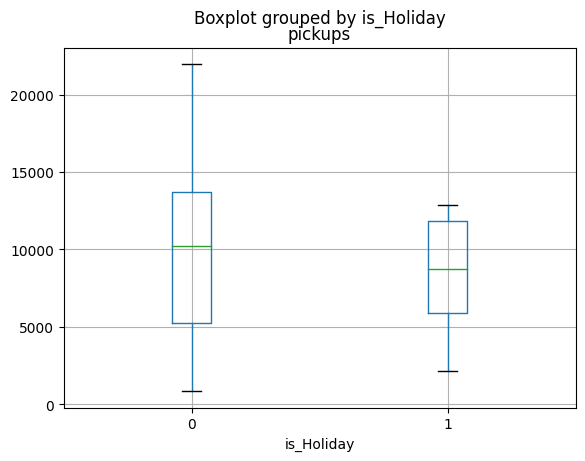

In [101]:
# merge.boxplot(merge[merge['is_Holiday'] == 1].pickups)
merge.boxplot(by='is_Holiday', column=['pickups'])

<AxesSubplot: title={'center': 'pickups'}, xlabel='weekday'>

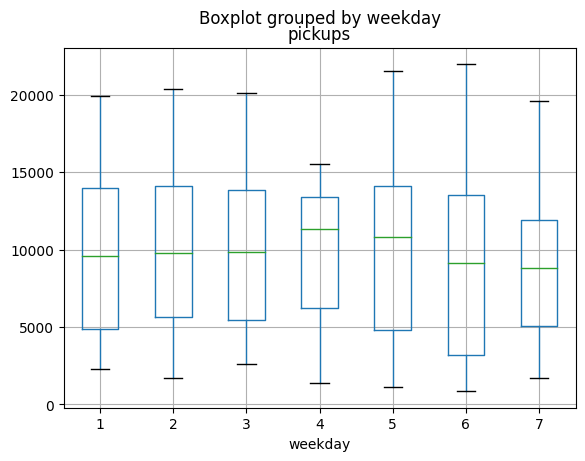

In [102]:
merge.boxplot(by='weekday', column=['pickups'])


C:\Users\mirun\AppData\Local\Temp\ipykernel_14404\3816422069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge.corr()


<AxesSubplot: >

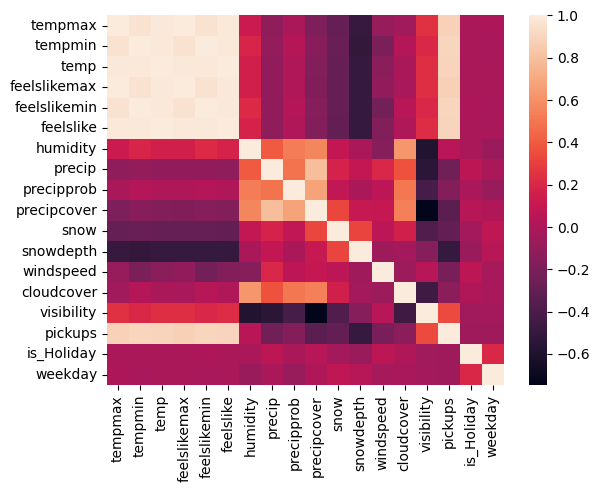

In [111]:
import seaborn as sns
corr = merge.corr()
sns.heatmap(corr)


## CLUSTER OF STATIONS

In [115]:
len(data_merge['start station id'].unique())


442

In [116]:
from sklearn.cluster import KMeans
K = 8
k=KMeans(K)

## DIMENSIONALITY REDUCTION / CLUSTER 

1. Normalizar datos
2. Reducir dimensiones
3. Elbow method
3. Clusters con y sin fit_transform
4. Mapa de estaciones con clusters, seasonal clusters (nb 7), media de vbariables por cada cluster

<!-- HACER PREDICCIONES POR CADA ESTACION -->